In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel("imputed_dataset.xlsx")

In [ ]:
# Define features (X) and target variable (y)
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='sgd', max_iter=500, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = mlp_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9405940594059405


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


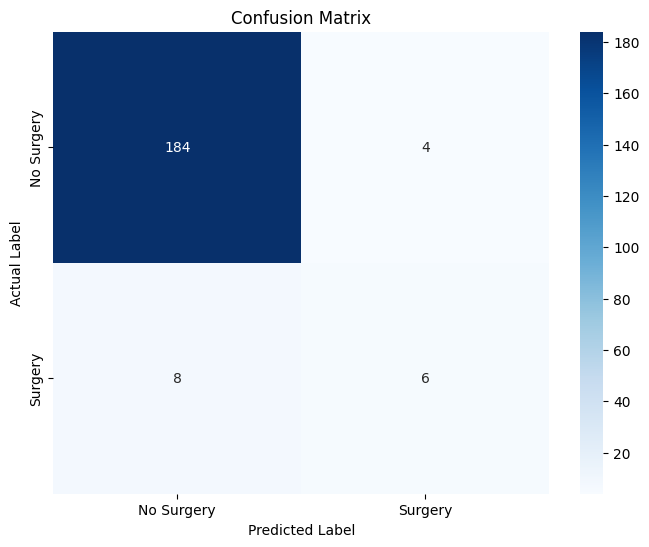

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Surgery', 'Surgery'], yticklabels=['No Surgery', 'Surgery'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()



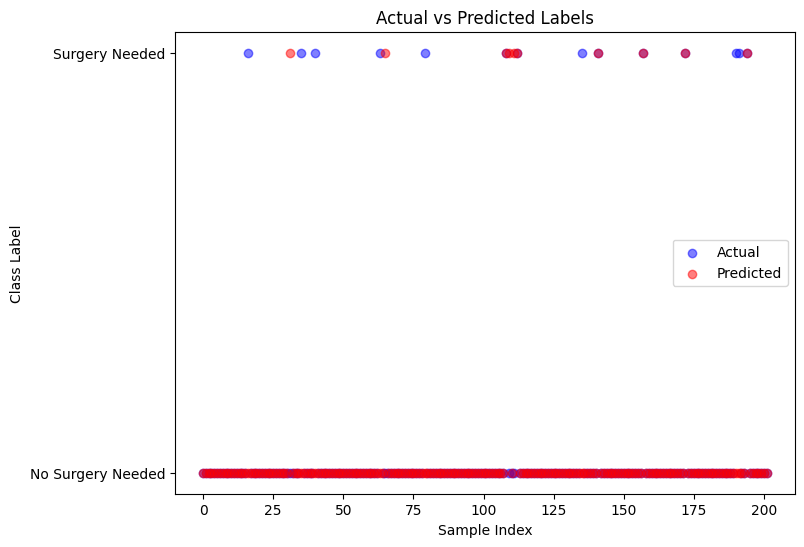

In [ ]:
# plot
label_mapping = {0: 'No Surgery Needed', 1: 'Surgery Needed'}
y_test_descriptive = np.array([label_mapping[label] for label in y_test])
y_pred_descriptive = np.array([label_mapping[label] for label in y_pred])

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test_descriptive)), y_test_descriptive, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred_descriptive)), y_pred_descriptive, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()


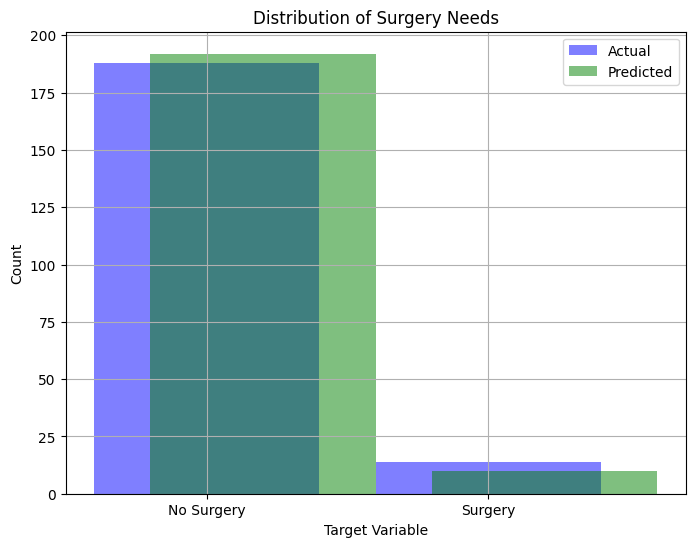

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the actual target values (0 for no surgery, 1 for surgery)
# and 'y_pred' contains the predicted values from your MLP classifier

# Count the occurrences of each class in y_test and y_pred
count_test = y_test.value_counts()
count_pred = pd.Series(y_pred).value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(count_test.index, count_test.values, alpha=0.5, color='blue', label='Actual')
plt.bar(count_pred.index + 0.2, count_pred.values, alpha=0.5, color='green', label='Predicted')
plt.xticks([0, 1], ['No Surgery', 'Surgery'])
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Distribution of Surgery Needs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras.initializers
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Define the number of features
num_features = len(df.columns)-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = Sequential([
    Dense(256, input_dim=num_features, activation='relu'),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.45),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.45),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.45),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.45),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.summary()

opt = Adam(learning_rate = 0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               45312     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 256)               1

8/8 [==============================] - 0s 4ms/step


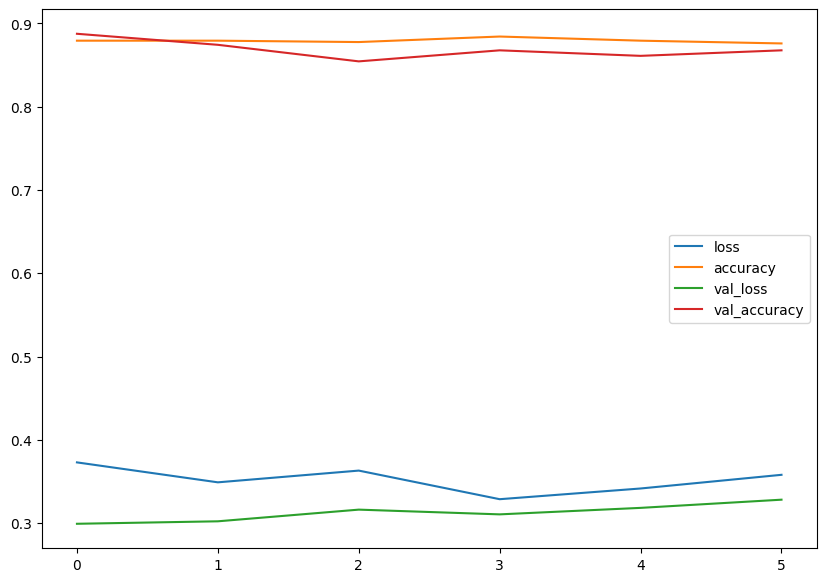

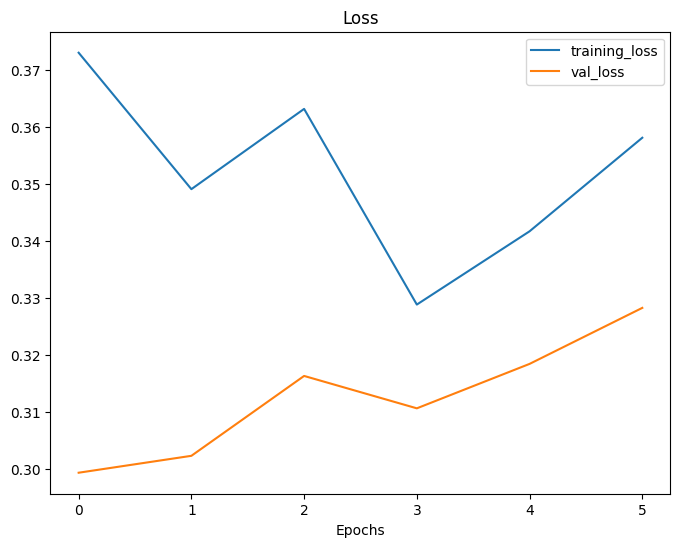

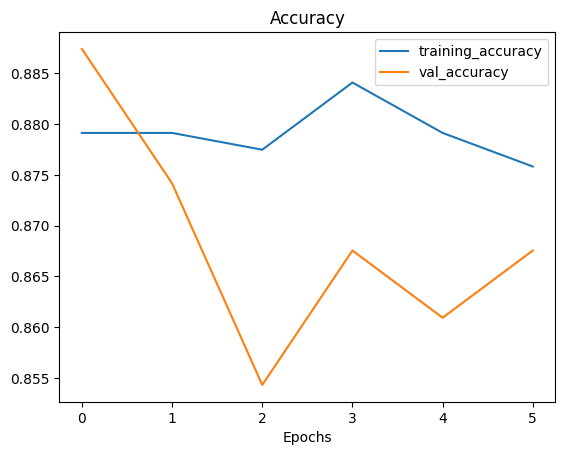

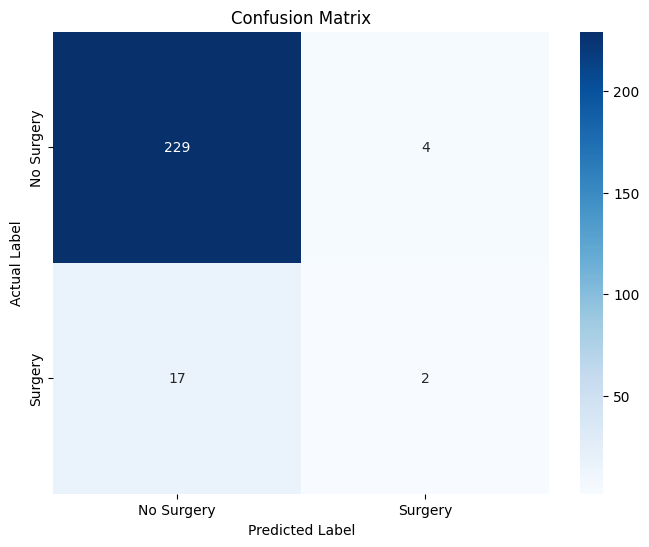

In [ ]:
from keras.api._v2.keras import Model

# Plot the training curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure(figsize=(8, 6))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

  # Check out the loss curves of model_4
plot_loss_curves(history)

y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Convert true labels to binary classes
y_test_binary = np.where(y_test > 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Surgery', 'Surgery'], yticklabels=['No Surgery', 'Surgery'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

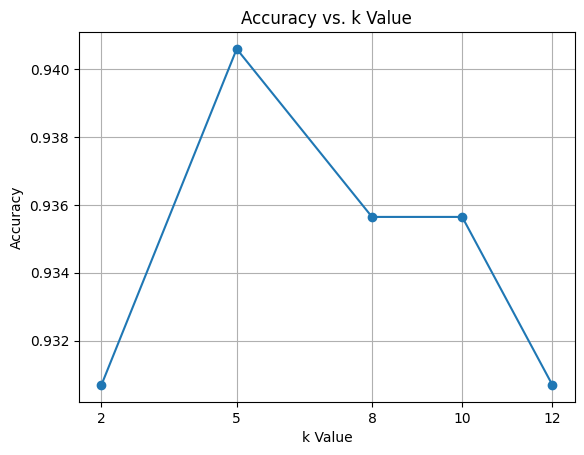

Accuracies for all k values: [0.9306930693069307, 0.9405940594059405, 0.9356435643564357, 0.9356435643564357, 0.9306930693069307]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_list = [2, 5, 8, 10, 12]

accuracies = []
k_values = []

for k in k_list:

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    y_pred = knn_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    k_values.append(k)

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("Accuracies for all k values:", accuracies)